# McDonalds India Menu Nutrition Analysis
Aim of the project is to analyse the McDonald's Menu Nutrition.

# DataSet
I have Downloaded this dataset from kaggle website. Here is the link: https://www.kaggle.com/datasets/deepcontractor/mcdonalds-india-menu-nutrition-facts

# What are we required to do
We have to analyse the McDonald's Menu Nutrition.

# Importing the Required Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("India_Menu.csv")

In [3]:
df.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


In [4]:
df.tail()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
136,Condiments Menu,Tomato Ketchup Sachets,8 g,11.23,0.08,23.45,0.00,0.01,0.08,2.63,2.33,1.64,71.05
137,Condiments Menu,Maple Syrup,30 g,86.40,0.00,0.00,0.00,0.00,0.30,21.60,16.20,5.34,15.00
138,Condiments Menu,Cheese Slice,14 g,51.03,3.06,3.99,2.89,0.01,13.43,0.72,0.54,0.00,178.95
139,Condiments Menu,Sweet Corn,40 g,45.08,1.47,1.00,0.22,0.04,2.00,7.55,2.54,0.00,0.04
140,Condiments Menu,Mixed Fruit Beverage,180 ml,72.25,0.65,0.02,0.02,0.02,0.01,18.00,16.83,0.00,10.80


In [5]:
df.describe()

,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,140.000000
mean,244.635461,7.493546,9.991702,4.997589,0.687163,26.350071,31.190284,15.464894,10.336950,362.064143
std,185.554837,8.336863,10.339511,4.900451,6.326136,50.334200,20.602044,15.690202,14.283388,473.160490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.360000,0.650000,0.460000,0.280000,0.060000,1.510000,15.740000,2.330000,0.000000,43.895000
50%,219.360000,4.790000,7.770000,4.270000,0.150000,8.390000,30.820000,9.160000,3.640000,152.025000
75%,339.520000,10.880000,14.160000,7.280000,0.220000,31.110000,46.000000,26.950000,19.230000,534.240000
max,834.360000,39.470000,45.180000,20.460000,75.260000,302.610000,93.840000,64.220000,64.220000,2399.490000


In [6]:
df.size

1833

In [7]:
df.shape

(141, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    object 
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             140 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


In [9]:
df.isna().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               1
dtype: int64

In [10]:
df = df.fillna(value=0)

In [11]:
df.isna().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               0
dtype: int64

# Visualization Of Data

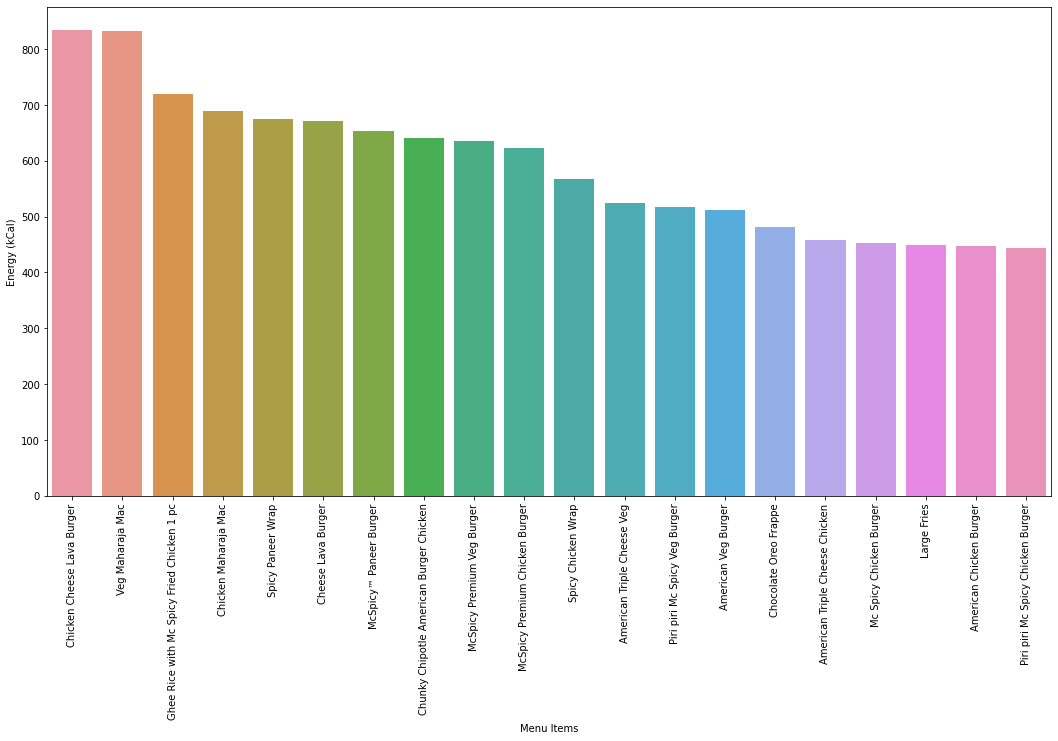

In [12]:
df = df.sort_values("Energy (kCal)", ascending=False).head(20)
plt.figure(figsize=(18,9))
ax = sns.barplot(x = 'Menu Items',
            y = 'Energy (kCal)',
            data = df)
ax.tick_params(axis='x', rotation=90)

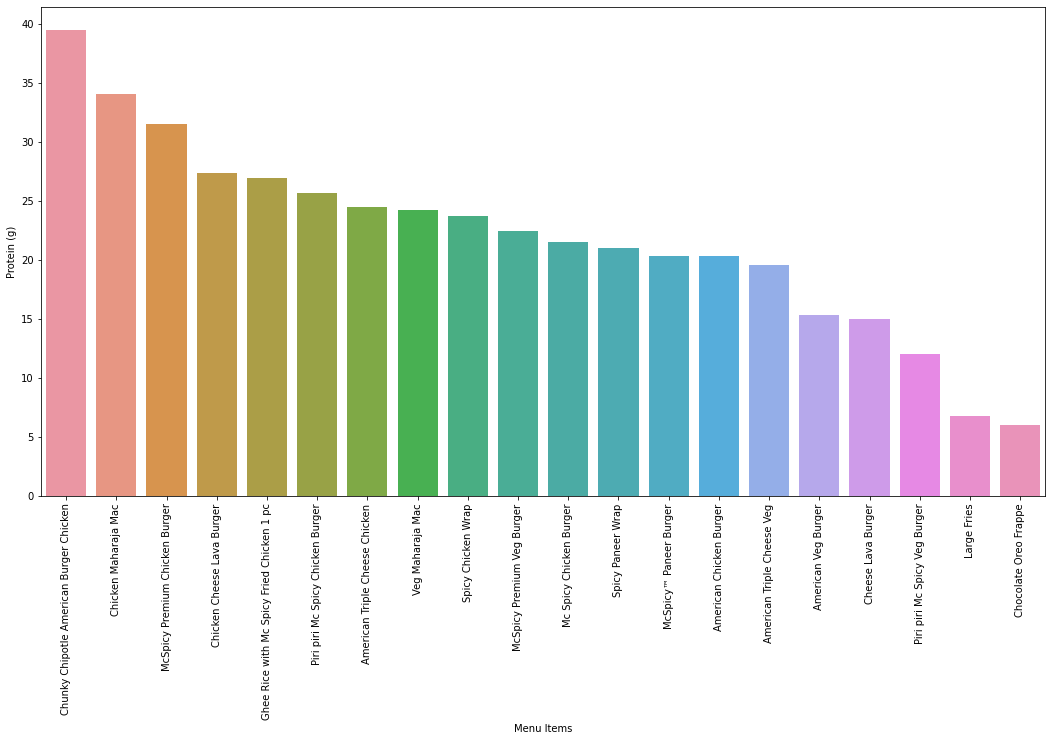

In [13]:
df = df.sort_values("Protein (g)", ascending=False).head(20)
plt.figure(figsize=(18,9))
ax = sns.barplot(x = 'Menu Items',
            y = 'Protein (g)',
            data = df)
ax.tick_params(axis='x', rotation=90)

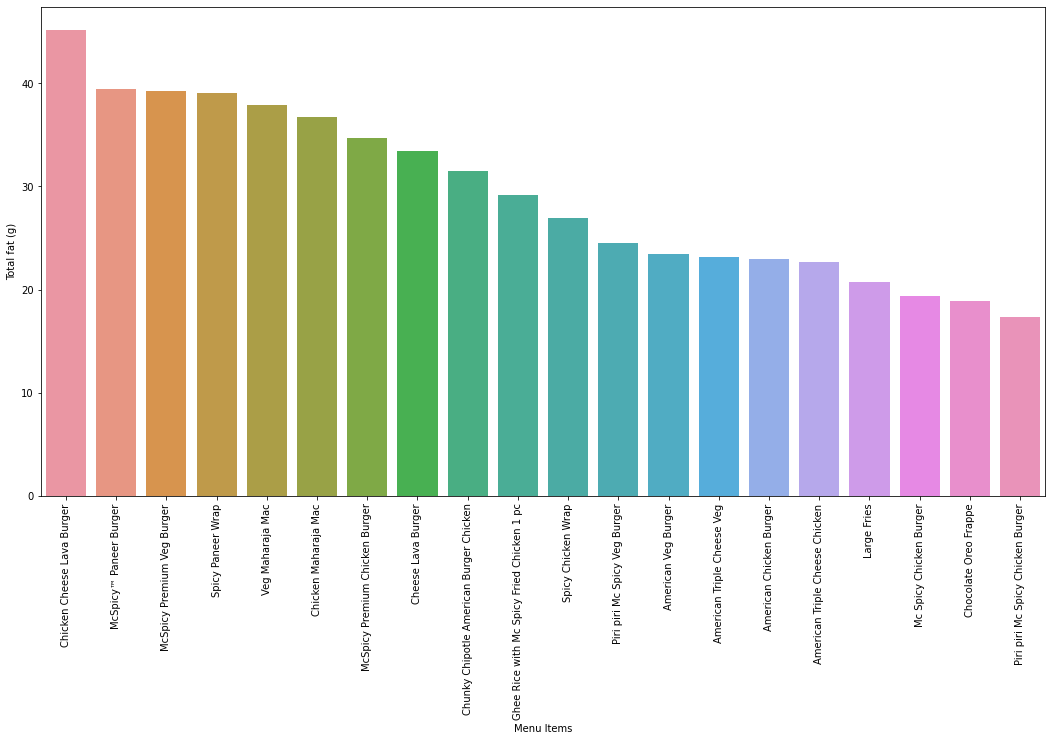

In [14]:
df = df.sort_values("Total fat (g)", ascending=False).head(20)
plt.figure(figsize=(18,9))
ax = sns.barplot(x = 'Menu Items',
            y = 'Total fat (g)',
            data = df)
ax.tick_params(axis='x', rotation=90)

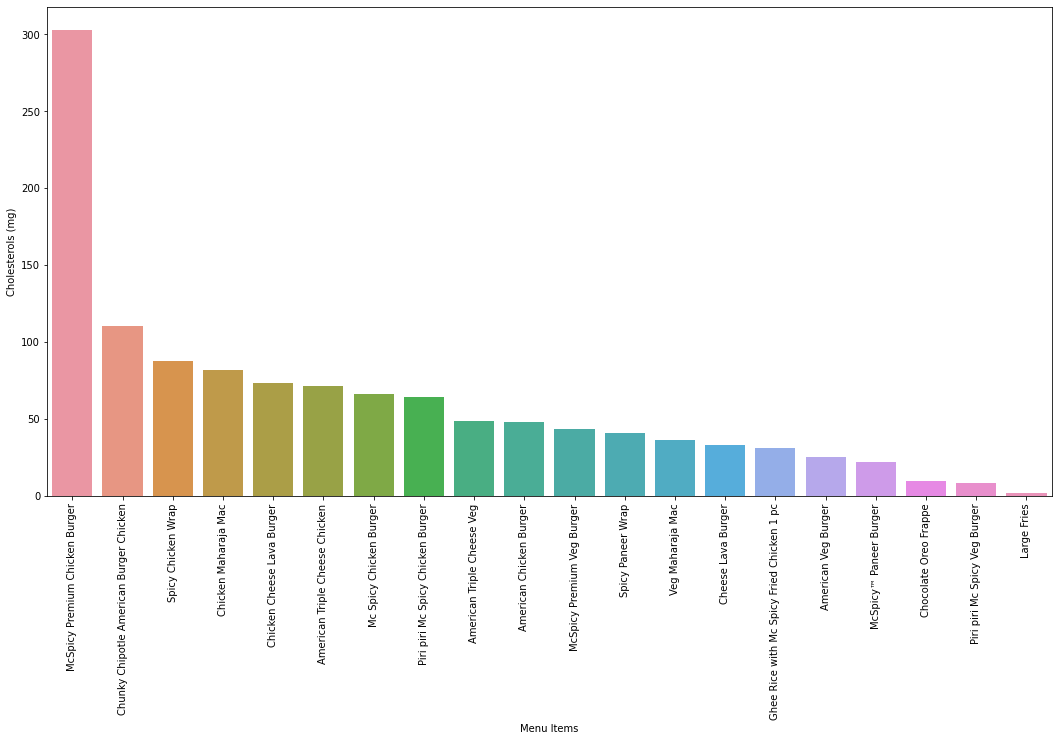

In [15]:
df = df.sort_values("Cholesterols (mg)", ascending=False).head(20)
plt.figure(figsize=(18,9))
ax = sns.barplot(x = 'Menu Items',
            y = 'Cholesterols (mg)',
            data = df)
ax.tick_params(axis='x', rotation=90)

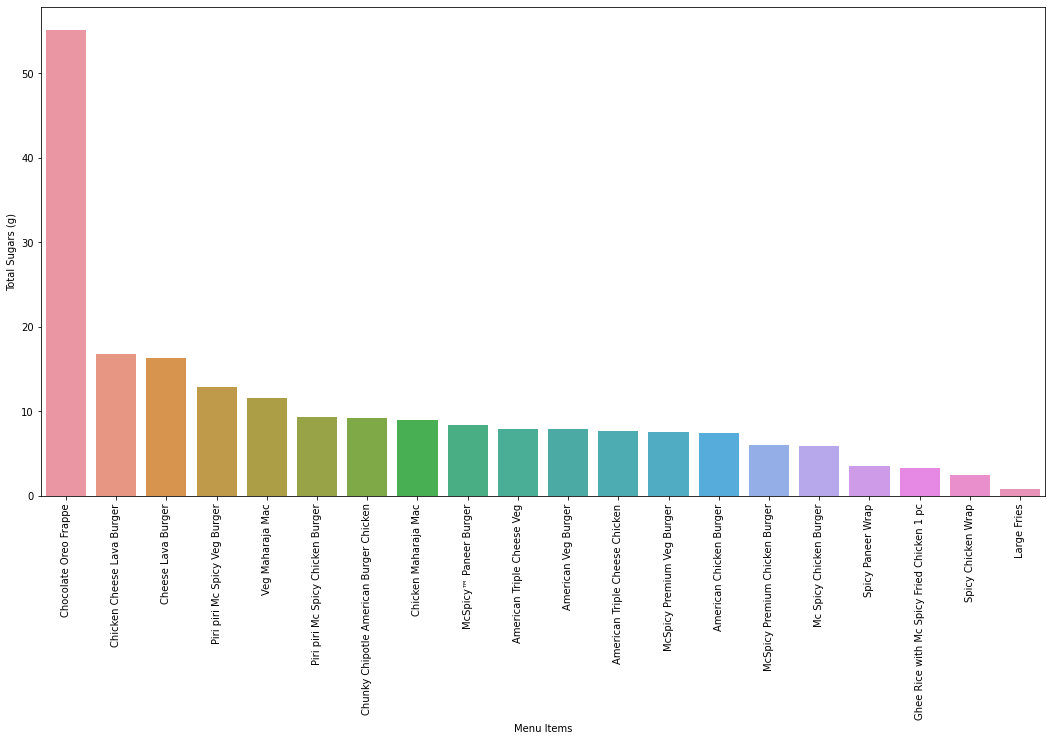

In [16]:
df = df.sort_values("Total Sugars (g)", ascending=False).head(20)
plt.figure(figsize=(18,9))
ax = sns.barplot(x = 'Menu Items',
            y = 'Total Sugars (g)',
            data = df)
ax.tick_params(axis='x', rotation=90)

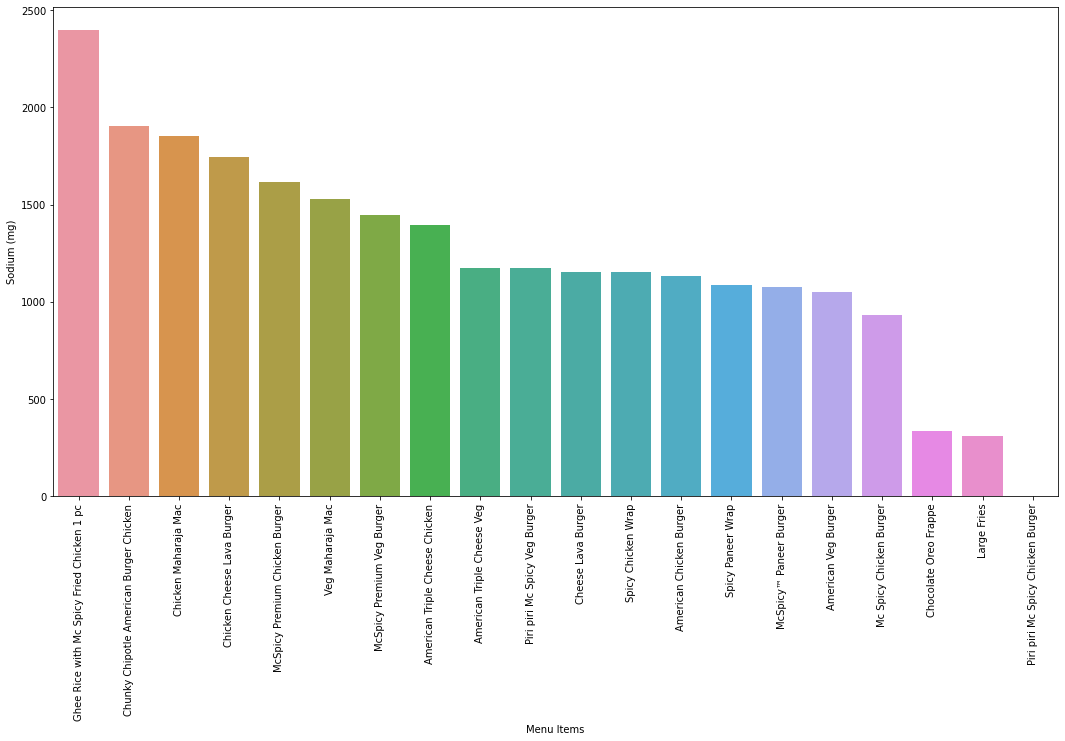

In [17]:
df = df.sort_values("Sodium (mg)", ascending=False).head(20)
plt.figure(figsize=(18,9))
ax = sns.barplot(x = 'Menu Items',
            y = 'Sodium (mg)',
            data = df)
ax.tick_params(axis='x', rotation=90)

<AxesSubplot:>

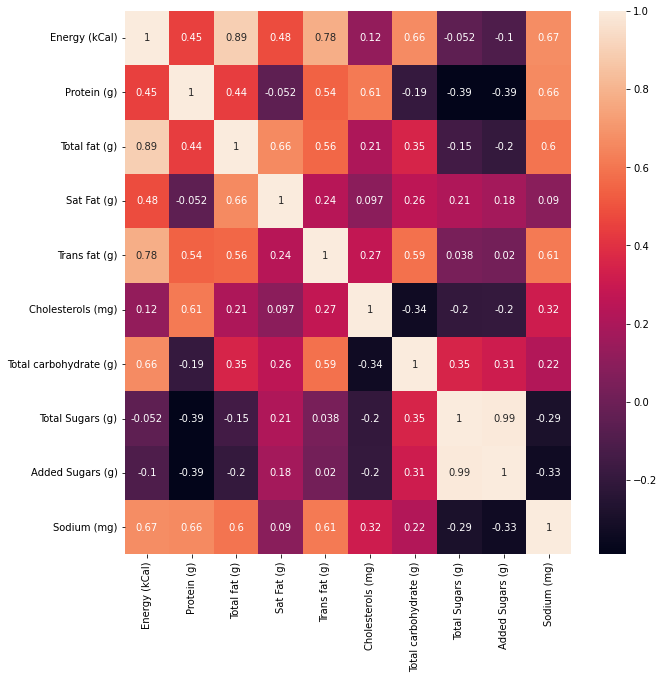

In [18]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

# Machine Learning Model Creation
- AdaBoot Regression Algorithm
- GradientBoosting Regression Algorithm

In [19]:
x_train=df.drop(columns="Energy (kCal)")
y_train=df["Energy (kCal)"]

In [20]:
numric_columns=x_train.select_dtypes(exclude='object').columns
print(numric_columns)
print('*'*100)
categorical_columns = x_train.select_dtypes(include='object').columns
print(categorical_columns)

Index(['Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)',
       'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)',
       'Added Sugars (g)', 'Sodium (mg)'],
      dtype='object')
****************************************************************************************************
Index(['Menu Category', 'Menu Items', 'Per Serve Size'], dtype='object')


In [21]:
numeric_feature = Pipeline(steps=[('handlingmissing',SimpleImputer(strategy='median')),('scaling',StandardScaler(with_mean=False))])
print(numeric_feature)

categorical_feature=Pipeline(steps=[('handlingmissing',SimpleImputer(strategy='most_frequent')),('encoding',OneHotEncoder()),('scaling',StandardScaler(with_mean=False))])
print(categorical_feature)

processing = ColumnTransformer([('numeic',numeric_feature,numric_columns),
                                ('cat',categorical_feature,categorical_columns)])
processing

Pipeline(steps=[('handlingmissing', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler(with_mean=False))])
Pipeline(steps=[('handlingmissing', SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder()),
                ('scaling', StandardScaler(with_mean=False))])


ColumnTransformer(transformers=[('numeic',
                                 Pipeline(steps=[('handlingmissing',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)',
       'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)',
       'Added Sugars (g)', 'Sodium (mg)'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('handlingmissing',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding', OneHotEncoder()),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['Menu Category', 'Menu Items', 'Per Serve Size'], dtype='object'))])

In [22]:
adaBootRegressor=Pipeline(steps = [('processing',processing),
                         ("pca",TruncatedSVD(n_components=51,random_state=0)),
                         ('modeling',AdaBoostRegressor())])
adaBootRegressor.fit(x_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeic',
                                                  Pipeline(steps=[('handlingmissing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)',
       'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)',
       'Added Sugars (g)', 'Sodium (mg)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('handlingmissing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder()),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['Menu Category', 'Menu Items', 'Per Serve Size'], dtype='object'))])),
                ('pca', TruncatedSVD(n_components=51, random_state=0)),
                ('modeling', AdaBoostRegressor())])

In [23]:
gradientBoostingRegressor=Pipeline(steps = [('processing',processing),
                         ("pca",TruncatedSVD(n_components=51,random_state=0)),
                         ('modeling',GradientBoostingRegressor())])
gradientBoostingRegressor.fit(x_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeic',
                                                  Pipeline(steps=[('handlingmissing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)',
       'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)',
       'Added Sugars (g)', 'Sodium (mg)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('handlingmissing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder()),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['Menu Category', 'Menu Items', 'Per Serve Size'], dtype='object'))])),
                ('pca', TruncatedSVD(n_components=51, random_state=0)),
                ('modeling', GradientBoostingRegressor())])

In [34]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

In [35]:
RandomForestRegressor=Pipeline(steps = [('processing',processing),
                         ("pca",TruncatedSVD(n_components=51,random_state=0)),
                         ('modeling',RandomForestRegressor())])
RandomForestRegressor.fit(x_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeic',
                                                  Pipeline(steps=[('handlingmissing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)',
       'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)',
       'Added Sugars (g)', 'Sodium (mg)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('handlingmissing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder()),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['Menu Category', 'Menu Items', 'Per Serve Size'], dtype='object'))])),
                ('pca', TruncatedSVD(n_components=51, random_state=0)),
                ('modeling', RandomForestRegressor())])

In [37]:
BaggingRegressor=Pipeline(steps = [('processing',processing),
                         ("pca",TruncatedSVD(n_components=51,random_state=0)),
                         ('modeling',BaggingRegressor())])
BaggingRegressor.fit(x_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeic',
                                                  Pipeline(steps=[('handlingmissing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)',
       'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)',
       'Added Sugars (g)', 'Sodium (mg)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('handlingmissing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder()),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['Menu Category', 'Menu Items', 'Per Serve Size'], dtype='object'))])),
                ('pca', TruncatedSVD(n_components=51, random_state=0)),
                ('modeling', BaggingRegressor())])

In [39]:
from sklearn.linear_model import  Ridge, Lasso, SGDRegressor

In [40]:
SGDRegressor=Pipeline(steps = [('processing',processing),
                         ("pca",TruncatedSVD(n_components=51,random_state=0)),
                         ('modeling',SGDRegressor())])
SGDRegressor.fit(x_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeic',
                                                  Pipeline(steps=[('handlingmissing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)',
       'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)',
       'Added Sugars (g)', 'Sodium (mg)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('handlingmissing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder()),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['Menu Category', 'Menu Items', 'Per Serve Size'], dtype='object'))])),
                ('pca', TruncatedSVD(n_components=51, random_state=0)),
                ('modeling', SGDRegressor())])

In [42]:
Lasso=Pipeline(steps = [('processing',processing),
                         ("pca",TruncatedSVD(n_components=51,random_state=0)),
                         ('modeling',Lasso())])
Lasso.fit(x_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeic',
                                                  Pipeline(steps=[('handlingmissing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)',
       'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)',
       'Added Sugars (g)', 'Sodium (mg)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('handlingmissing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder()),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['Menu Category', 'Menu Items', 'Per Serve Size'], dtype='object'))])),
                ('pca', TruncatedSVD(n_components=51, random_state=0)),
                ('modeling', Lasso())])

In [44]:
Ridge=Pipeline(steps = [('processing',processing),
                         ("pca",TruncatedSVD(n_components=51,random_state=0)),
                         ('modeling',Ridge())])
Ridge.fit(x_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeic',
                                                  Pipeline(steps=[('handlingmissing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)',
       'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)',
       'Added Sugars (g)', 'Sodium (mg)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('handlingmissing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder()),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['Menu Category', 'Menu Items', 'Per Serve Size'], dtype='object'))])),
                ('pca', TruncatedSVD(n_components=51, random_state=0)),
                ('modeling', Ridge())])

In [45]:
print("adaBootRegressor=",adaBootRegressor.score(x_train,y_train))
print("gradientBoostingRegressor=",gradientBoostingRegressor.score(x_train,y_train))
print("RandomForestRegressor=",RandomForestRegressor.score(x_train,y_train))
print("BaggingRegressor=",BaggingRegressor.score(x_train,y_train))
print("SGDRegressor=",SGDRegressor.score(x_train,y_train))
print("Lasso=",Lasso.score(x_train,y_train))
print("Ridge=",Ridge.score(x_train,y_train))

adaBootRegressor= 0.991977556232862
gradientBoostingRegressor= 0.9999999963266836
RandomForestRegressor= 0.959297326371577
BaggingRegressor= 0.9441542909866394
SGDRegressor= 0.9999997421011699
Lasso= 0.9996099594664937
Ridge= 0.9998811057332703


# Conclusion
- Chicken Cheese Lava Burger has highest kiloCalories of Energy.
- Chunky Chipotle American Burger Chicken has highest grams of Protein
- Chicken Cheese Lava Burger has highest Total grams of fat
- McSpicy Premium Chicken Burger has highest grams of Saturated Fat
- Chocolate Oreo Frappe has highest grams of Trans fat
- Ghee Rice with Mc Spicy Fried Chicken 1 pc has highest miligrams of Cholesterols.
- Seven Machine Learning Models are created.

| Sl. No. | Models | Accuracy Scores |
|---|---|---|
| 1 | AdaBoot Regression Algorithm | 0.991977556232862 |
| 2 | GradientBoosting Regression Algorithm | 0.9999999963266836 |
| 3 | Random Forest Regression Algorithm | 0.959297326371577 |
| 4 | Bagging Regression Algorithm | 0.9441542909866394 |
| 5 | SGD Regression Algorithm | 0.9999997421011699 |
| 6 | Lasso Regression Algorithm | 0.9996099594664937 |
| 7 | Ridge Regression Algorithm | 0.9998811057332703 |

- GradientBoosting Regression Algorithm is the best fitted Model as it gave the best predicted score.